In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


#imported necessary Library

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df=pd.read_csv(r'C:\\Users\\HP\Downloads\Credit-Score-Data\train.csv')

df.info() #checking the data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

data input stay correct ✔

In [3]:
#checkin the data

df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
#getting the shape of the Data


print('This dataset is  make up of :',df.shape[0],'rows & Columns is made up',df.shape[1])

This dataset is  make up of : 100000 rows & Columns is made up 28


In [5]:
#let get the full columns 

pd.set_option('display.max_columns',28)

In [6]:
#Let view

df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [7]:
#creating a Numeric columns 

num_df=df.select_dtypes('number')

In [8]:
#also creating a Object columns


cat_df=df.select_dtypes('object')

cat_df

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments,Good
1,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...
99995,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99996,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Medium_value_payments,Poor
99997,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


In [9]:
#with this division of dataframe sketch can us with columns description

import sketch

cat_df.sketch.ask('can you give me a friendly names and single sentence descriptions of each column ?(format output as HTML List)')

In [10]:
#All Thanks to Sketch!!!
#creating a function for value uniqueness

def uniqness(df):
    for i in df.columns:
        print(f'{i}:{df[i].unique()}')

In [11]:
uniqness(cat_df)

Name:['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Occupation:['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Type_of_Loan:['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Credit_Mix:['Good' 'Standard' 'Bad']
Payment_of_Min_Amount:['No' 'NM' 'Yes']
Payment_Behaviour:['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']
Credit_Score:['Good' 'Standard' 'Poor']


EDA:

In [12]:
#getting the value count of the Loan type

cat_df['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [13]:
#putting this to frame

df['Type_of_Loan'].value_counts().to_frame()

,Type_of_Loan
No Data,11408
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
...,...
"Not Specified, Mortgage Loan, Auto Loan, and Payday Loan",8
"Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan",8
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8
"Student Loan, Auto Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, Debt Consolidation Loan, and Debt Consolidation Loan",8


In [14]:
#trying to figure out why Number of Loan and The Loan tye, 
#They Seems to be thesame the only different is one is Nuemric why one is object catgeory

df[:1]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good


In [15]:
#figuring out the type of loan individual have collected, because i noticed custumer have colleted more than one loan 

loan=df[:2]

df['Type_of_Loan'][1]

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

In [16]:
#let check for duplicated values, we never can tell

df.duplicated().sum()

0

In [17]:
#let Used credit mix columns 


good_df=df.query('Credit_Mix=="Good"')

In [18]:
good_df[:5]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


# >WHat Are attribute that make custumer a good Credit mix and a bad credit Mix? let check ?

In [19]:
#Yes, I remeber One Of this statistical Method,getting to the differences between lowest and The max Amount` 

np.ptp(good_df['Annual_Income'])

170487.04499999998

In [20]:
#let look at bad credit mix, what make it different ?

bad_df=df.query('Credit_Mix=="Bad"')


bad_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
152,5862,16640,1,Reema,31.0,68834394.0,Entrepreneur,19300.34,1512.361667,6.0,7.0,17.0,5.0,"Mortgage Loan, Debt Consolidation Loan, Payday...",52.0,19.0,9.95,7.0,Bad,2430.21,29.934186,218.0,Yes,49.572062,44.509510,Low_spent_Small_value_payments,312.487689,Poor
153,5863,16640,2,Reema,31.0,68834394.0,Entrepreneur,19300.34,1512.361667,6.0,7.0,17.0,5.0,"Mortgage Loan, Debt Consolidation Loan, Payday...",51.0,18.0,9.95,7.0,Bad,2430.21,36.641204,219.0,NM,49.572062,44.509510,High_spent_Small_value_payments,306.365891,Poor
154,5864,16640,3,Reema,31.0,68834394.0,Entrepreneur,19300.34,1512.361667,6.0,7.0,17.0,5.0,"Mortgage Loan, Debt Consolidation Loan, Payday...",48.0,19.0,15.95,7.0,Bad,2430.21,37.624862,220.0,Yes,49.572062,44.509510,Low_spent_Large_value_payments,230.845509,Poor
155,5865,16640,4,Reema,31.0,68834394.0,Entrepreneur,19300.34,1512.361667,6.0,7.0,17.0,5.0,"Mortgage Loan, Debt Consolidation Loan, Payday...",51.0,19.0,9.95,7.0,Bad,2430.21,28.870387,221.0,Yes,49.572062,44.509510,High_spent_Small_value_payments,300.236075,Standard
156,5866,16640,5,Reema,32.0,68834394.0,Entrepreneur,19300.34,1512.361667,6.0,7.0,17.0,5.0,"Mortgage Loan, Debt Consolidation Loan, Payday...",51.0,19.0,9.95,7.0,Bad,2430.21,28.058846,222.0,Yes,49.572062,44.509510,Low_spent_Small_value_payments,218.621554,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,155613,34304,4,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,18.31,9.0,Bad,3571.70,30.614953,71.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,328.301277,Standard
99988,155614,34304,5,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,18.31,9.0,Bad,3571.70,28.508250,72.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,208.047884,Standard
99989,155615,34304,6,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,16.31,9.0,Bad,3571.70,33.359987,73.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,307.659291,Standard
99990,155616,34304,7,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,18.31,9.0,Bad,3571.70,25.123535,74.0,Yes,60.964772,34.662906,Low_spent_Large_value_payments,228.750392,Standard


In [21]:
#getting the Max values and minmum value

def minmax(X):
    max_ind=df[X].idxmax()
    min_ind=df[X].idxmin()
    maximum=pd.DataFrame(df.loc[max_ind,:])
    minimum=pd.DataFrame(df.loc[min_ind,:])
    return pd.concat([maximum,minimum],axis=1)

minmax('Annual_Income')

,15688,39672
ID,29166,65142
Customer_ID,5960,6205
Month,1,1
Name,Olga Dzyubenkop,Whiteb
Age,34.0,14.0
SSN,958256723.0,259110934.0
Occupation,Mechanic,Writer
Annual_Income,179987.28,7005.93
Monthly_Inhand_Salary,14816.94,835.8275
Num_Bank_Accounts,5.0,10.0


A credit score is a numerical representation of an individual's creditworthiness. That is ,
It is a measure of how likely a person is to repay their debts and fulfill financial obligations based on their past borrowing and repayment behavior. 

We Have two different custumer over Here, One is Mechanic while one is Writer. Mechanic happen to be earning *10 of what Writer is earning but till yet is till have a poor credi score but on the bright Side is a good custumer because is earning is Big.

what Make the Mechanic be a baad ccustumer ? I don't known, may repayment behaviour? they both have 11 days repayment behaiour.

--> The teacher outstanding Debit Seems to be Higher than the Mechanic Waoh!!! but do all of this contribute to the Credit Scores?
 i don't know ? 
 

But on the Bright side we will be making more moneey by given the mechanic loan because they earning higer income,while the Teacher, nevertheless all are custumer because The More we lend out the more income we get as a Company and we aim at making more profit.

**Data Observation:**

One of the beautiful trend of the data is the custumer occupation, they didn't look at your Annual Income to categorize their creditworthiness rather they look at your repayment behaviour and their outstanding Debit to generalizze their  creditworthiness.

In [22]:
#getting the Max values and The mean values for bad credir record for credit_history_age

def minmax(X):
    max_ind=good_df[X].idxmax()
    min_ind=good_df[X].idxmin()
    maximum=pd.DataFrame(good_df.loc[max_ind,:])
    minimum=pd.DataFrame(good_df.loc[min_ind,:])
    return pd.concat([maximum,minimum],axis=1)

minmax('Num_of_Delayed_Payment')

,7736,13
ID,17238,5651
Customer_ID,29583,8625
Month,1,6
Name,Katharina Barty,Rick Rothackerj
Age,40.0,28.0
SSN,995652513.0,4075839.0
Occupation,Mechanic,Teacher
Annual_Income,9767.32,34847.84
Monthly_Inhand_Salary,872.943333,3037.986667
Num_Bank_Accounts,5.0,2.0


According to DataSet; They claim that credit Mix is good when Num_of day of repayment  hit 23 days and Credit_score till record Good when it Exceed 23 days **Waoh**,of repayment and 23 days is maximum !!!😮😮 

Are They any other thing they are putting into condisderation we don't know ???

LEt check ?

I think they also putting outstanding debit into consideration of custumers behaviour, because how can you exceed 23 days of num of repayment and till recorded as Good Credit scores?


let check for the bad Custumer

In [23]:
#getting the Max values and The mean values for bad credir record for credit_history_age

def minmax(X):
    max_ind=bad_df[X].idxmax()
    min_ind=bad_df[X].idxmin()
    maximum=pd.DataFrame(bad_df.loc[max_ind,:])
    minimum=pd.DataFrame(bad_df.loc[min_ind,:])
    return pd.concat([maximum,minimum],axis=1)

minmax('Num_of_Delayed_Payment')

,541,2873
ID,6443,9943
Customer_ID,41302,24621
Month,6,2
Name,Silvia Aloisiq,Gavin Jonesu
Age,42.0,15.0
SSN,405467599.0,41286430.0
Occupation,Entrepreneur,Teacher
Annual_Income,58674.66,20639.79
Monthly_Inhand_Salary,4824.555,1541.9825
Num_Bank_Accounts,8.0,7.0


In [24]:
poor_df=df.query('Credit_Score=="Poor"')

In [25]:
#getting the Max values and The mean values for bad credir record for credit_history_age

def minmax(X):
    max_ind=poor_df[X].idxmax()
    min_ind=poor_df[X].idxmin()
    maximum=pd.DataFrame(poor_df.loc[max_ind,:])
    minimum=pd.DataFrame(poor_df.loc[min_ind,:])
    return pd.concat([maximum,minimum],axis=1)

minmax('Num_of_Delayed_Payment')

,1760,899
ID,8274,6981
Customer_ID,30439,13914
Month,1,4
Name,env,Aless ray
Age,26.0,54.0
SSN,532393348.0,26575729.0
Occupation,Manager,Scientist
Annual_Income,34128.92,41345.58
Monthly_Inhand_Salary,2740.076667,3260.465
Num_Bank_Accounts,6.0,0.0


The Company are not putting any mertrics or variable into consideration before segementing the custumer proper creditworthiness.


So that  is the problem, and that what we doing 

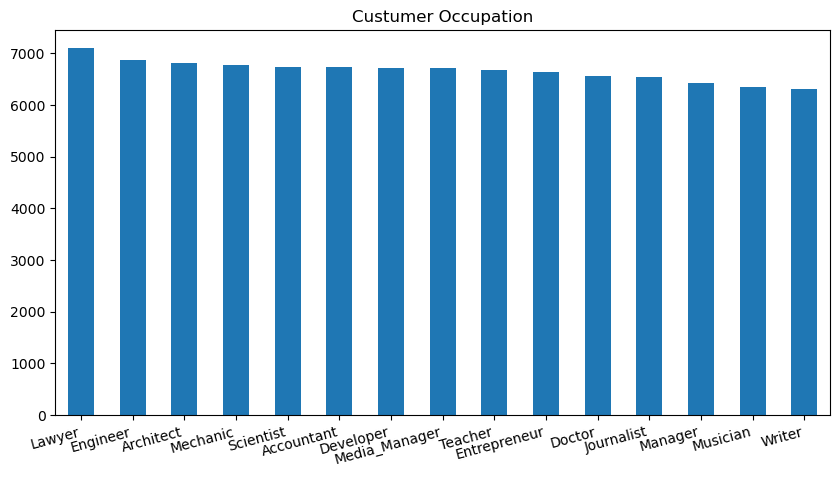

In [26]:
df['Occupation'].value_counts().plot.bar(figsize=(10,5),title='Custumer Occupation')
plt.xticks(rotation=15,ha='right');

In [27]:
data=df[['Name','Annual_Income','Occupation','Customer_ID']].groupby('Customer_ID').first()


data

,Name,Annual_Income,Occupation
Customer_ID,,,
1006,Matthias Blamontb,16756.18,Journalist
1007,Soyoung Kimu,21212.91,Manager
1008,Koht,33540.43,Developer
1009,Edd,80983.64,Accountant
1011,Terry Wadeu,104142.56,Writer
...,...,...,...
50984,Victoriah,19267.17,Mechanic
50990,Yueo,32125.54,Lawyer
50992,Jason Langev,9608.03,Journalist


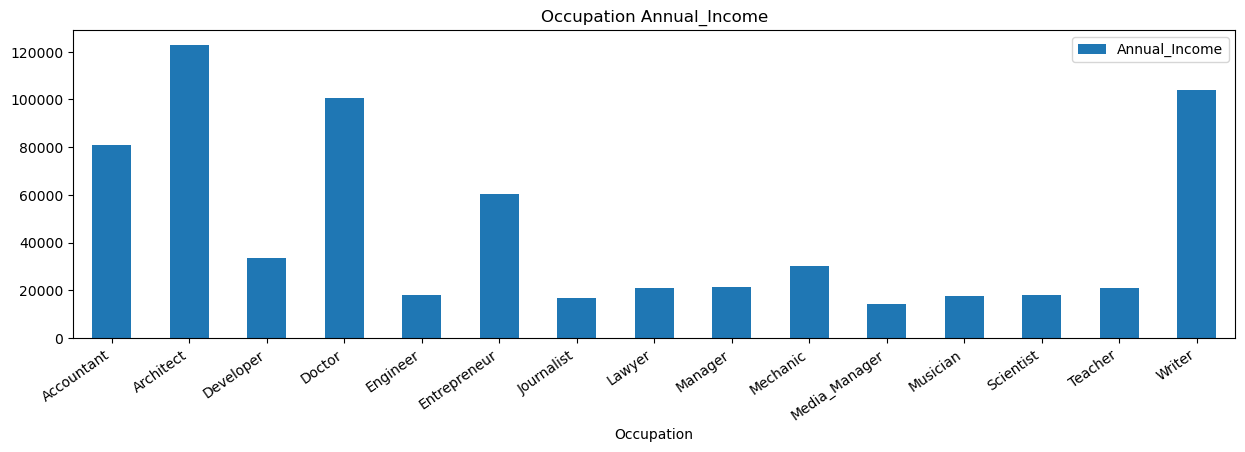

In [28]:
data[['Occupation','Annual_Income']].groupby('Occupation').first().plot(kind='bar',title='Occupation Annual_Income',figsize=(15,4))
plt.xticks(rotation=35,ha='right');

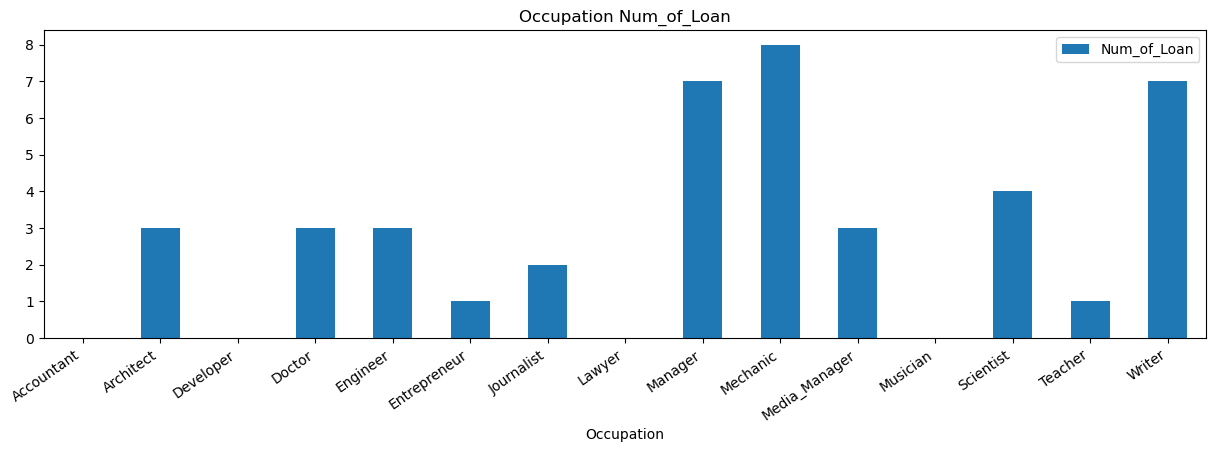

In [29]:
df[['Occupation','Num_of_Loan']].groupby('Occupation').first().plot(kind='bar',title='Occupation Num_of_Loan',figsize=(15,4))
plt.xticks(rotation=35,ha='right');

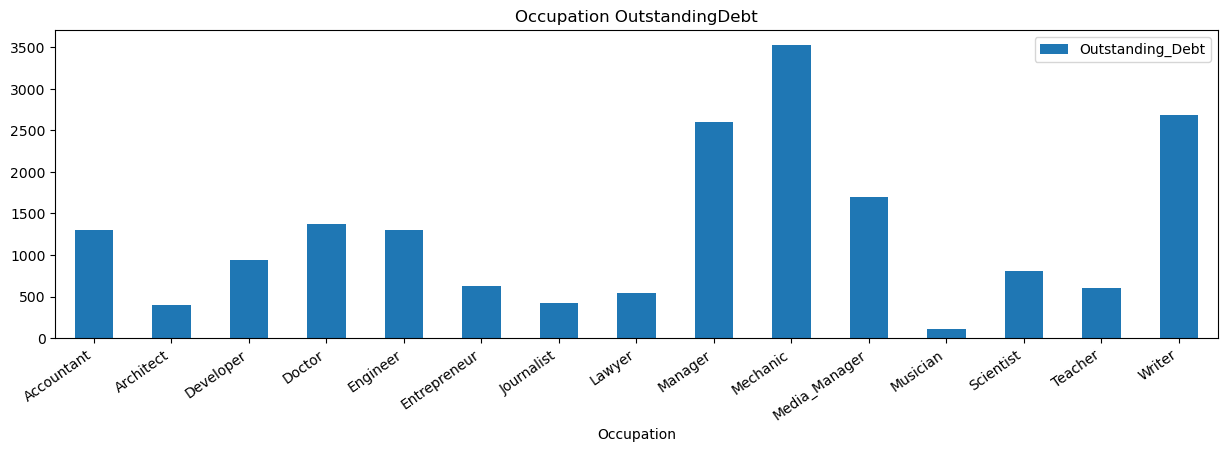

In [30]:
df[['Occupation','Outstanding_Debt']].groupby('Occupation').first().plot(kind='bar',title='Occupation OutstandingDebt',figsize=(15,4))
plt.xticks(rotation=35,ha='right');

<AxesSubplot:xlabel='Occupation', ylabel='Outstanding_Debt'>

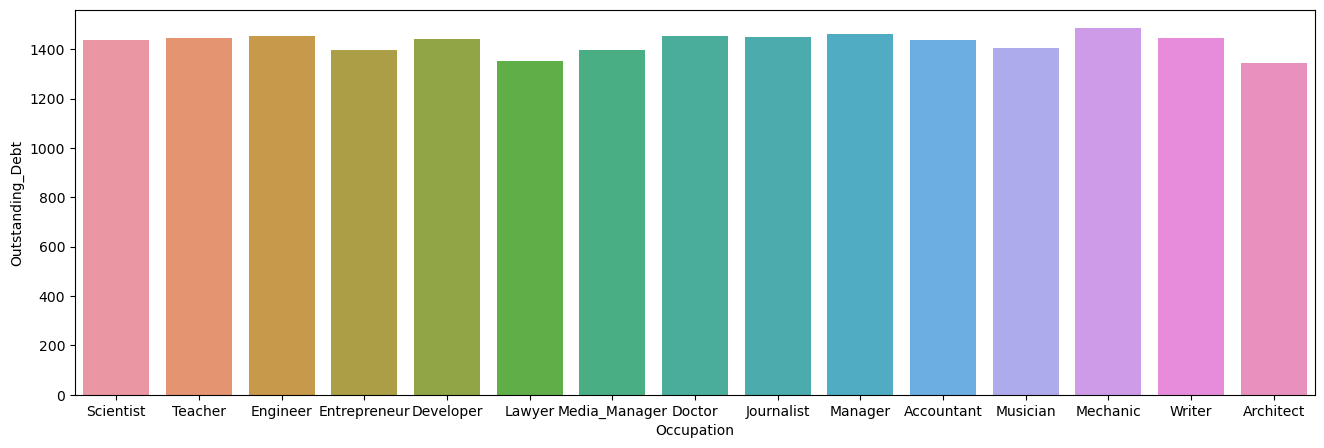

In [31]:
plt.figure(figsize=(16,5),dpi=100)
sns.barplot(data=df,x='Occupation',y='Outstanding_Debt',ci=None)

In [32]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [33]:
df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='Num_Bank_Accounts'>

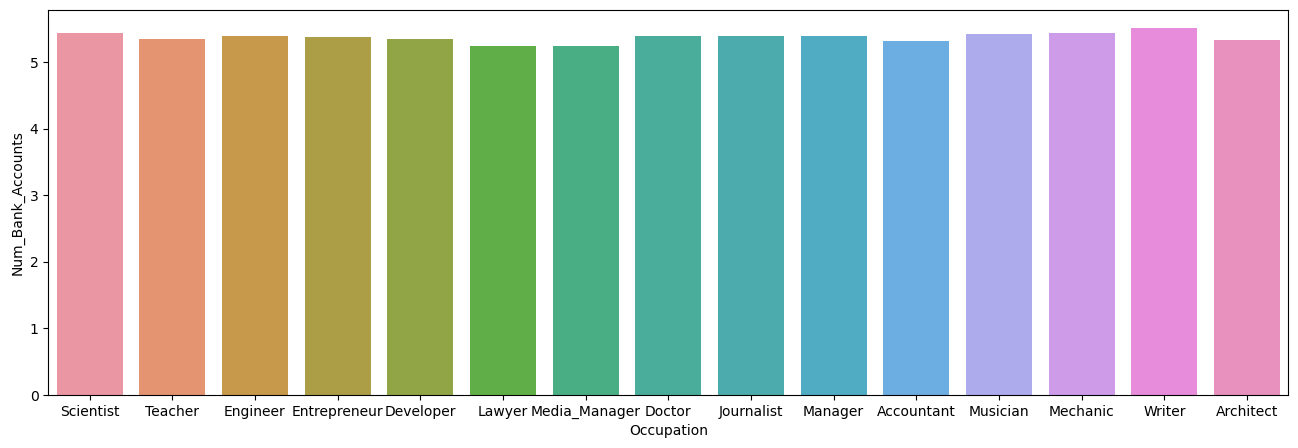

In [34]:
plt.figure(figsize=(16,5),dpi=100)
sns.barplot(data=df,x='Occupation',y='Num_Bank_Accounts',ci=None)

small yansh dey shakke, the individual in writer has more Bank account than any other occupation

In [35]:
#Regular Custumers?

df['Name'].value_counts().to_frame()[:10]

,Name
Jessicad,48
Langep,48
Stevex,48
Vaughanl,40
Ronald Groverk,40
Huwk,40
Andreaj,40
Valetkevitchv,40
Deepa Seetharamanm,40
Danielz,40


In [36]:
#bottom level custumer?

df['Name'].value_counts().to_frame().tail(10)

,Name
Jeb Blountq,8
iniz,8
Nicholasq,8
Prodhane,8
Harro Teni,8
Breidthardtj,8
Sven Egenterx,8
Antonella Ciancioc,8
Valentina Zan,8
Nicks,8


💡


is goinG to be a good idea if we can create a columns of Number of appearance, this is columns is going to Play major 

in Creditworthiness because with your Numbers Appearce we can trust you with our money, while with Limit appearance we can't really trust you with our loan but to play risky game with you.

In [37]:
df['Customer_ID'].value_counts()

3392     8
39924    8
23267    8
48794    8
18548    8
        ..
11956    8
30819    8
40329    8
49221    8
37932    8
Name: Customer_ID, Length: 12500, dtype: int64

In [38]:
df['Name'].value_counts()

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64

Am trying to figure out heree The option to used , either With custumer_id or Names?

In [39]:
#let try This columns Name SSN

df['SSN'].value_counts()

821000265.0    8
544050223.0    8
381365261.0    8
994731178.0    8
647449598.0    8
              ..
936122774.0    8
91611869.0     8
576385212.0    8
281301712.0    8
78735990.0     8
Name: SSN, Length: 12500, dtype: int64

now i got two answers which making it unique then i ave come to conclusion that custumer_id Is what We usinG

In [40]:
dframe=df[['ID','Customer_ID','Month','Name','Age','SSN','Occupation','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Type_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Payment_of_Min_Amount','Total_EMI_per_month','Amount_invested_monthly','Payment_Behaviour','Monthly_Balance','Credit_Score']].groupby('Customer_ID').first().reset_index()

In [41]:
dframe

,Customer_ID,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1006,27750,1,Matthias Blamontb,37.0,354656948.0,Journalist,16756.18,1331.348333,9.0,6.0,22.0,2.0,"Credit-Builder Loan, and Payday Loan",48.0,10.0,10.66,8.0,Standard,1941.73,37.501111,182.0,Yes,27.442089,45.301068,High_spent_Medium_value_payments,310.391676,Poor
1,1007,53250,1,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.742500,3.0,4.0,10.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",19.0,19.0,12.13,1.0,Standard,993.15,35.268983,346.0,No,45.745700,30.373472,High_spent_Medium_value_payments,323.555078,Standard
2,1008,56850,1,Koht,37.0,802194704.0,Developer,33540.43,2655.035833,6.0,3.0,17.0,0.0,No Data,25.0,11.0,14.11,6.0,Standard,1138.97,27.816244,292.0,Yes,0.000000,50.930150,High_spent_Small_value_payments,406.622885,Standard
3,1009,84330,1,Edd,22.0,891062189.0,Accountant,80983.64,6692.636667,6.0,3.0,15.0,4.0,"Credit-Builder Loan, Student Loan, Not Specifi...",19.0,18.0,16.91,7.0,Standard,982.44,39.755126,331.0,Yes,188.456595,101.120201,High_spent_Medium_value_payments,581.429820,Standard
4,1011,39354,1,Terry Wadeu,43.0,422130011.0,Writer,104142.56,8433.546667,3.0,5.0,5.0,3.0,"Personal Loan, Auto Loan, and Auto Loan",15.0,17.0,15.28,6.0,Standard,1371.80,26.890190,179.0,Yes,257.738646,102.488034,High_spent_Small_value_payments,553.403317,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,50984,18798,1,Victoriah,20.0,151944427.0,Mechanic,19267.17,1531.597500,6.0,5.0,26.0,6.0,"Home Equity Loan, Mortgage Loan, Payday Loan, ...",13.0,12.0,15.71,12.0,Standard,1732.19,24.939468,157.0,Yes,77.630937,47.873509,Low_spent_Small_value_payments,210.594332,Poor
12496,50990,99882,1,Yueo,38.0,94540952.0,Lawyer,32125.54,2559.128333,7.0,9.0,23.0,3.0,"Mortgage Loan, Auto Loan, and Auto Loan",15.0,16.0,8.07,8.0,Standard,2557.14,25.955617,70.0,Yes,59.330922,34.883593,High_spent_Large_value_payments,385.513540,Poor
12497,50992,50466,1,Jason Langev,23.0,76136508.0,Journalist,9608.03,735.669167,7.0,4.0,10.0,6.0,"Student Loan, Credit-Builder Loan, Mortgage Lo...",8.0,14.0,10.44,5.0,Standard,1494.17,24.324514,159.0,Yes,25.467999,0.000000,Low_spent_Medium_value_payments,307.711984,Standard
12498,50996,80658,1,Koh Guia,38.0,946823382.0,Media_Manager,27305.93,2289.494167,3.0,4.0,19.0,0.0,No Data,21.0,17.0,8.93,6.0,Standard,454.40,38.424864,206.0,Yes,0.000000,26.378439,Low_spent_Medium_value_payments,368.442434,Standard


In [42]:
df['Customer_ID'].value_counts().unique()

array([8], dtype=int64)

So it appear that Every Each Custuemr on this dataset happen to hhave 8 Each duplicated with different Attribute but the same user ID.

so there Is No Way the Appearence level will work when we gat Equall apearance.

In [43]:
dframe

,Customer_ID,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1006,27750,1,Matthias Blamontb,37.0,354656948.0,Journalist,16756.18,1331.348333,9.0,6.0,22.0,2.0,"Credit-Builder Loan, and Payday Loan",48.0,10.0,10.66,8.0,Standard,1941.73,37.501111,182.0,Yes,27.442089,45.301068,High_spent_Medium_value_payments,310.391676,Poor
1,1007,53250,1,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.742500,3.0,4.0,10.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",19.0,19.0,12.13,1.0,Standard,993.15,35.268983,346.0,No,45.745700,30.373472,High_spent_Medium_value_payments,323.555078,Standard
2,1008,56850,1,Koht,37.0,802194704.0,Developer,33540.43,2655.035833,6.0,3.0,17.0,0.0,No Data,25.0,11.0,14.11,6.0,Standard,1138.97,27.816244,292.0,Yes,0.000000,50.930150,High_spent_Small_value_payments,406.622885,Standard
3,1009,84330,1,Edd,22.0,891062189.0,Accountant,80983.64,6692.636667,6.0,3.0,15.0,4.0,"Credit-Builder Loan, Student Loan, Not Specifi...",19.0,18.0,16.91,7.0,Standard,982.44,39.755126,331.0,Yes,188.456595,101.120201,High_spent_Medium_value_payments,581.429820,Standard
4,1011,39354,1,Terry Wadeu,43.0,422130011.0,Writer,104142.56,8433.546667,3.0,5.0,5.0,3.0,"Personal Loan, Auto Loan, and Auto Loan",15.0,17.0,15.28,6.0,Standard,1371.80,26.890190,179.0,Yes,257.738646,102.488034,High_spent_Small_value_payments,553.403317,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,50984,18798,1,Victoriah,20.0,151944427.0,Mechanic,19267.17,1531.597500,6.0,5.0,26.0,6.0,"Home Equity Loan, Mortgage Loan, Payday Loan, ...",13.0,12.0,15.71,12.0,Standard,1732.19,24.939468,157.0,Yes,77.630937,47.873509,Low_spent_Small_value_payments,210.594332,Poor
12496,50990,99882,1,Yueo,38.0,94540952.0,Lawyer,32125.54,2559.128333,7.0,9.0,23.0,3.0,"Mortgage Loan, Auto Loan, and Auto Loan",15.0,16.0,8.07,8.0,Standard,2557.14,25.955617,70.0,Yes,59.330922,34.883593,High_spent_Large_value_payments,385.513540,Poor
12497,50992,50466,1,Jason Langev,23.0,76136508.0,Journalist,9608.03,735.669167,7.0,4.0,10.0,6.0,"Student Loan, Credit-Builder Loan, Mortgage Lo...",8.0,14.0,10.44,5.0,Standard,1494.17,24.324514,159.0,Yes,25.467999,0.000000,Low_spent_Medium_value_payments,307.711984,Standard
12498,50996,80658,1,Koh Guia,38.0,946823382.0,Media_Manager,27305.93,2289.494167,3.0,4.0,19.0,0.0,No Data,21.0,17.0,8.93,6.0,Standard,454.40,38.424864,206.0,Yes,0.000000,26.378439,Low_spent_Medium_value_payments,368.442434,Standard


In [44]:
dframe['Credit_Score'].value_counts()

Standard    6943
Poor        3582
Good        1975
Name: Credit_Score, dtype: int64

In [45]:
dframe['Credit_Mix'].value_counts()

Standard    5731
Good        3798
Bad         2971
Name: Credit_Mix, dtype: int64

In [46]:
dframe.head()

,Customer_ID,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1006,27750,1,Matthias Blamontb,37.0,354656948.0,Journalist,16756.18,1331.348333,9.0,6.0,22.0,2.0,"Credit-Builder Loan, and Payday Loan",48.0,10.0,10.66,8.0,Standard,1941.73,37.501111,182.0,Yes,27.442089,45.301068,High_spent_Medium_value_payments,310.391676,Poor
1,1007,53250,1,Soyoung Kimu,48.0,964812710.0,Manager,21212.91,1496.742500,3.0,4.0,10.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",19.0,19.0,12.13,1.0,Standard,993.15,35.268983,346.0,No,45.745700,30.373472,High_spent_Medium_value_payments,323.555078,Standard
2,1008,56850,1,Koht,37.0,802194704.0,Developer,33540.43,2655.035833,6.0,3.0,17.0,0.0,No Data,25.0,11.0,14.11,6.0,Standard,1138.97,27.816244,292.0,Yes,0.000000,50.930150,High_spent_Small_value_payments,406.622885,Standard
3,1009,84330,1,Edd,22.0,891062189.0,Accountant,80983.64,6692.636667,6.0,3.0,15.0,4.0,"Credit-Builder Loan, Student Loan, Not Specifi...",19.0,18.0,16.91,7.0,Standard,982.44,39.755126,331.0,Yes,188.456595,101.120201,High_spent_Medium_value_payments,581.429820,Standard
4,1011,39354,1,Terry Wadeu,43.0,422130011.0,Writer,104142.56,8433.546667,3.0,5.0,5.0,3.0,"Personal Loan, Auto Loan, and Auto Loan",15.0,17.0,15.28,6.0,Standard,1371.80,26.890190,179.0,Yes,257.738646,102.488034,High_spent_Small_value_payments,553.403317,Standard


In [47]:
from sklearn.preprocessing import LabelEncoder

Label=LabelEncoder()
dframe['Occupation']=Label.fit_transform(dframe['Occupation'])
dframe['Type_of_Loan']=Label.fit_transform(dframe['Type_of_Loan'])
dframe['Type_of_Loan']=Label.fit_transform(dframe['Type_of_Loan'])
dframe['Credit_Mix']=Label.fit_transform(dframe['Credit_Mix'])
dframe['Payment_Behaviour']=Label.fit_transform(dframe['Payment_Behaviour'])

In [48]:
dframe.head()

,Customer_ID,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1006,27750,1,Matthias Blamontb,37.0,354656948.0,6,16756.18,1331.348333,9.0,6.0,22.0,2.0,1407,48.0,10.0,10.66,8.0,2,1941.73,37.501111,182.0,Yes,27.442089,45.301068,1,310.391676,Poor
1,1007,53250,1,Soyoung Kimu,48.0,964812710.0,8,21212.91,1496.742500,3.0,4.0,10.0,3.0,2483,19.0,19.0,12.13,1.0,2,993.15,35.268983,346.0,No,45.745700,30.373472,1,323.555078,Standard
2,1008,56850,1,Koht,37.0,802194704.0,2,33540.43,2655.035833,6.0,3.0,17.0,0.0,3463,25.0,11.0,14.11,6.0,2,1138.97,27.816244,292.0,Yes,0.000000,50.930150,2,406.622885,Standard
3,1009,84330,1,Edd,22.0,891062189.0,0,80983.64,6692.636667,6.0,3.0,15.0,4.0,1369,19.0,18.0,16.91,7.0,2,982.44,39.755126,331.0,Yes,188.456595,101.120201,1,581.429820,Standard
4,1011,39354,1,Terry Wadeu,43.0,422130011.0,14,104142.56,8433.546667,3.0,5.0,5.0,3.0,4950,15.0,17.0,15.28,6.0,2,1371.80,26.890190,179.0,Yes,257.738646,102.488034,2,553.403317,Standard


In [92]:
dframe['Num_of_Loan'].unique()

array([2, 3, 0, 4, 7, 1, 6, 5, 8, 9])

In [95]:
dframe['Num_of_Delayed_Payment'].unique()

array([10, 19, 11, 18, 17,  2, 14, 23,  8, 25,  4, 12, 13,  5, 16, 20, 15,
        1, 22,  7,  3,  6,  9,  0, 24, 21])

In [100]:
#Defining The criteriat


def criteriat(X):
    if X[0] >= 7 and X[1] <=5:
        return "Top_Custumer"
    elif X[0] == 6 and X[1] >= 6 or X[1] <=10:
        return "Good Custumer"
    elif X[0] ==5 and X[1] >=11 or X[1] <=15:
        return 'Not Bad'
    elif X[0] ==4 and X[1] >=16 or X[1]<=20:
        return "bad"
    elif X[0] ==3 and X[1] >=21 or X[1]<=25:
        return "Risky"
    elif X[0] <=2 and X[1] >=25:
        return "Too_Risky"

In [101]:
dframe['Class_Scores']=dframe[['Num_of_Loan','Num_of_Delayed_Payment']].apply(lambda X: (criteriat(X)),axis=1)

In [102]:
dframe

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Class_Scores
0,1,37,6,16756,1331,9,6,22,2,1407,48,10,10.66,8.0,2,1941,37,182,45,1,310,0,Good Custumer
1,1,48,8,21212,1496,3,4,10,3,2483,19,19,12.13,1.0,2,993,35,346,30,1,323,2,bad
2,1,37,2,33540,2655,6,3,17,0,3463,25,11,14.11,6.0,2,1138,27,292,50,2,406,2,Not Bad
3,1,22,0,80983,6692,6,3,15,4,1369,19,18,16.91,7.0,2,982,39,331,101,1,581,2,bad
4,1,43,14,104142,8433,3,5,5,3,4950,15,17,15.28,6.0,2,1371,26,179,102,2,553,2,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,1,20,9,19267,1531,6,5,26,6,2449,13,12,15.71,12.0,2,1732,24,157,47,5,210,0,Good Custumer
12496,1,38,7,32125,2559,7,9,23,3,2841,15,16,8.07,8.0,2,2557,25,70,34,0,385,0,bad
12497,1,23,6,9608,735,7,4,10,6,5707,8,14,10.44,5.0,2,1494,24,159,0,4,307,2,Good Custumer
12498,1,38,10,27305,2289,3,4,19,0,3463,21,17,8.93,6.0,2,454,38,206,26,4,368,2,bad


#problems resolve so by doing all of this i have easily label out our custumers by their behaaviour pattern.

so the company can Now lend Out their loan without been worried, atleast 75% assures that those custumers labels Top Custumer can be given loan without hhaving a doubt mind.

and Also a custumer with standard Catgeory can also a given A loan with 50% that he/She will payback but labels such ricky,bad etc can't be trusted they can only be given loan with condition.

In [103]:
dframe['Class_Scores'].value_counts()

Good Custumer    5184
Not Bad          3572
bad              2874
Risky             869
Top_Custumer        1
Name: Class_Scores, dtype: int64

In [104]:
dframe.query('Class_Scores=="Top_Custumer"')

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Class_Scores
1267,1,25,7,83237,7162,8,7,16,7,1054,12,5,10.83,7.0,2,2652,25,219,98,1,331,2,Top_Custumer


We Segemented these Custumers based on The Repayment behaviourism.

let Build a model

In [105]:
dframe['Class_Scores'].isnull().sum()

0

In [60]:
dframe['Credit_Score']=dframe['Credit_Score'].map({"Poor":0,"Good":1,"Standard":2})

In [64]:
dframe=dframe.drop(['Customer_ID','ID','Name','SSN','Payment_of_Min_Amount','Total_EMI_per_month'],axis=1)

In [66]:
dframe['Age']=dframe['Age'].astype(int)
dframe['Annual_Income']=dframe['Annual_Income'].astype(int)
dframe['Monthly_Inhand_Salary']=dframe['Monthly_Inhand_Salary'].astype(int)
dframe['Num_Bank_Accounts']=dframe['Num_Bank_Accounts'].astype(int)
dframe['Num_Credit_Card']=dframe['Num_Credit_Card'].astype(int)
dframe['Interest_Rate']=dframe['Interest_Rate'].astype(int)
dframe['Num_of_Loan']=dframe['Num_of_Loan'].astype(int)
dframe['Outstanding_Debt']=dframe['Outstanding_Debt'].astype(int)
dframe['Credit_Utilization_Ratio']=dframe['Credit_Utilization_Ratio'].astype(int)
dframe['Credit_History_Age']=dframe['Credit_History_Age'].astype(int)
dframe['Monthly_Balance']=dframe['Monthly_Balance'].astype(int)
dframe['Amount_invested_monthly']=dframe['Amount_invested_monthly'].astype(int)

In [67]:
dframe.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Class_Scores
0,1,37,6,16756,1331,9,6,22,2,1407,48.0,10.0,10.66,8.0,2,1941,37,182,45,1,310,0,Good Custumer
1,1,48,8,21212,1496,3,4,10,3,2483,19.0,19.0,12.13,1.0,2,993,35,346,30,1,323,2,Good Custumer
2,1,37,2,33540,2655,6,3,17,0,3463,25.0,11.0,14.11,6.0,2,1138,27,292,50,2,406,2,Good Custumer
3,1,22,0,80983,6692,6,3,15,4,1369,19.0,18.0,16.91,7.0,2,982,39,331,101,1,581,2,Good Custumer
4,1,43,14,104142,8433,3,5,5,3,4950,15.0,17.0,15.28,6.0,2,1371,26,179,102,2,553,2,Good Custumer


In [68]:
dframe['Delay_from_due_date']=dframe['Delay_from_due_date'].astype(int)


In [106]:
X=dframe[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]]

y=dframe['Class_Scores']

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [109]:
model=DecisionTreeClassifier()

In [110]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual_Income           12500 non-null  int32
 1   Monthly_Inhand_Salary   12500 non-null  int32
 2   Num_Bank_Accounts       12500 non-null  int32
 3   Num_Credit_Card         12500 non-null  int32
 4   Interest_Rate           12500 non-null  int32
 5   Num_of_Loan             12500 non-null  int32
 6   Delay_from_due_date     12500 non-null  int32
 7   Num_of_Delayed_Payment  12500 non-null  int32
 8   Credit_Mix              12500 non-null  int32
 9   Outstanding_Debt        12500 non-null  int32
 10  Credit_History_Age      12500 non-null  int32
 11  Monthly_Balance         12500 non-null  int32
dtypes: int32(12)
memory usage: 586.1 KB


In [113]:
dframe['Credit_Mix'].unique()

array([2, 1, 0])

In [120]:
X.sample(8)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Monthly_Balance
6991,44719,3969,6,6,29,7,41,19,0,3818,155,268
9074,109901,9423,2,4,9,2,9,6,1,932,276,445
8851,84169,7221,5,6,18,1,23,7,2,617,349,815
2547,49497,4201,8,4,8,4,17,14,2,129,291,164
5483,147894,12186,0,5,4,0,15,7,1,1301,195,498
1026,20938,1896,6,9,23,5,19,16,0,1657,116,252
5547,39891,3246,4,4,22,6,18,16,2,2411,77,106
9249,20479,1629,6,6,28,7,24,25,0,2911,7,194


In [111]:
test_prediction=model.predict(X_test)

In [122]:
print("Credit Score Prediction : ")
a = int(input("Annual Income: "))
b = int(input("Monthly Inhand Salary: "))
c = int(input("Number of Bank Accounts: "))
d = int(input("Number of Credit cards: "))
e = int(input("Interest rate: "))
f = int(input("Number of Loans: "))
h = int(input('Delay_from_due_date: '))
i = int(input("Number of delayed payments: "))
j = int(input("Credit Mix (Bad: 0, Standard: 2, Good: 1) : "))
k = int(input("Outstanding Debt: "))
l = int(input("Credit History Age: "))
n = int(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Annual Income: 1200000
Monthly Inhand Salary: 50000
Number of Bank Accounts: 5
Number of Credit cards: 5
Interest rate: 25
Number of Loans: 6
Delay_from_due_date: 19
Number of delayed payments: 18
Credit Mix (Bad: 0, Standard: 2, Good: 1) : 0
Outstanding Debt: 1200
Credit History Age: 10
Monthly Balance: 100
Predicted Credit Score =  ['Good Custumer']


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
